![](https://www.listchallenges.com/f/lists/6c536c33-489b-4bee-b259-00074fa53a0d.jpg)

# More To Come. Stay Tuned. !!
If there are any suggestions/changes you would like to see in the Kernel please let me know :). Appreciate every ounce of help!

**This notebook will always be a work in progress**. Please leave any comments about further improvements to the notebook! Any feedback or constructive criticism is greatly appreciated!.** If you like it or it helps you , you can upvote and/or leave a comment :).**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 




# More is coming Soon

In [3]:
train_data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')
submission = pd.read_csv("./input/sample_submission.csv")

In [4]:
print("Training data size",train_data.shape)
print("test data size",test_data.shape)
submission.head()

Training data size (1225029, 3)
test data size (117703, 2)


,id,landmarks
0,000088da12d664db,8815 0.03
1,0001623c6d808702,7249 0.61
2,0001bbb682d45002,5328 0.5
3,0002362830cfe3a3,4188 0.96
4,000270c9100de789,10506 0.82


In [5]:
train_data.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


In [6]:
test_data.head()

,id,url
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...


In [7]:
# now open the URL
temp = 4444
print('id', train_data['id'][temp])
print('url:', train_data['url'][temp])
print('landmark id:', train_data['landmark_id'][temp])

id a6c207c04d7c3835
url: https://lh5.googleusercontent.com/-oJsiYZW1JPE/Rnah5Zf5XxI/AAAAAAAAADY/tLtMU5hCdlI/s1600/
landmark id: 233


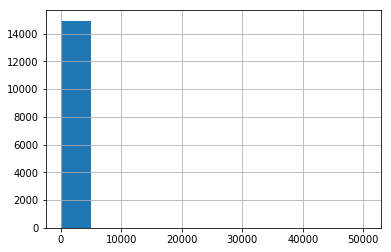

In [8]:
train_data['landmark_id'].value_counts().hist()

In [9]:
# missing data in training data 
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
landmark_id,0,0.0
url,0,0.0
id,0,0.0


In [10]:
# missing data in test data 
total = test_data.isnull().sum().sort_values(ascending = False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending = False)
missing_test_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_test_data.head()

,Total,Percent
url,0,0.0
id,0,0.0


## We can see there is no missing data
## Now Lets see most frequent Landmarks

In [15]:
# Occurance of landmark_id in decreasing order(Top categories)
temp = pd.DataFrame(train_data.landmark_id.value_counts().head(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,9633,50337
1,6051,50148
2,6599,23415
3,9779,18471
4,2061,13271
5,5554,11147
6,6651,9508
7,6696,9222


 ### The most frequent landmark_id is 9633  and the count is 50337.

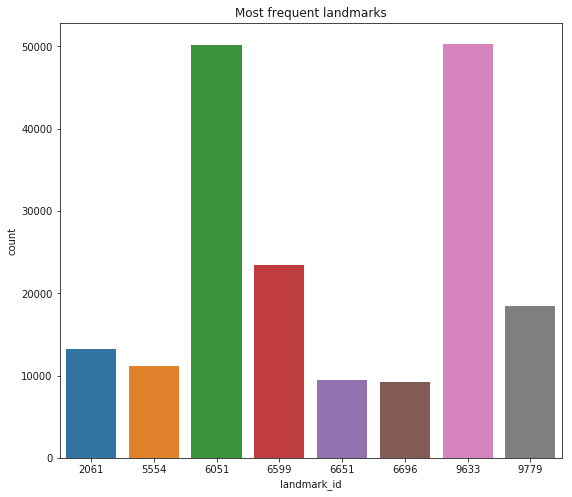

In [16]:
# Plot the most frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

## Lets see least frequent landmarks

In [17]:
# Occurance of landmark_id in increasing order
temp = pd.DataFrame(train_data.landmark_id.value_counts().tail(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,4753,1
1,6261,1
2,4144,1
3,1527,1
4,6025,1
5,4334,1
6,5865,1
7,8381,1


### There are many least frequent landmarks whose count is 1

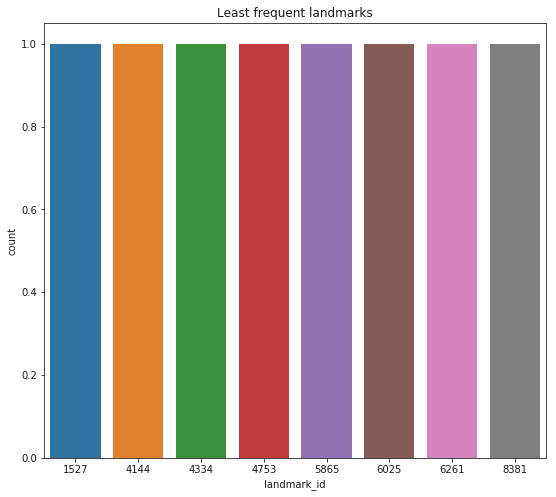

In [18]:
# Plot the least frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

## lets see unique URLs

In [19]:
# Unique URL's
train_data.nunique()

id             1225029
url            1225029
landmark_id      14951
dtype: int64

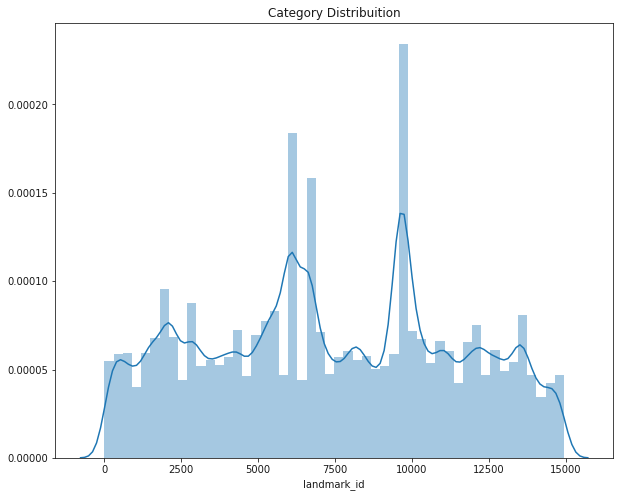

In [20]:
#Class distribution
plt.figure(figsize = (10, 8))
plt.title('Category Distribuition')
sns.distplot(train_data['landmark_id'])

plt.show()

In [21]:
print("Number of classes under 20 occurences",(train_data['landmark_id'].value_counts() <= 20).sum(),'out of total number of categories',len(train_data['landmark_id'].unique()))

Number of classes under 20 occurences 8797 out of total number of categories 14951


## Lets display some images from URLs / Some URLs Visulization 

In [22]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))

In [23]:
category = train_data['landmark_id'].value_counts().keys()[0]
urls = train_data[train_data['landmark_id'] == category]['url']
display_category(urls, "")

In [24]:
category = train_data['landmark_id'].value_counts().keys()[1]
urls = train_data[train_data['landmark_id'] == category]['url']
display_category(urls, "")

# Now Lets extract the website name and see their occurances

In [25]:
# Extract site_names for train data
temp_list = list()
for path in train_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
train_data['site_name'] = temp_list
# Extract site_names for test data
temp_list = list()
for path in test_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
test_data['site_name'] = temp_list

### We have added one new column "site_name". lets see

In [26]:
print("Training data size",train_data.shape)
print("test data size",test_data.shape)

Training data size (1225029, 4)
test data size (117703, 3)


In [27]:
train_data.head(8)

,id,url,landmark_id,site_name
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676,static.panoramio.com
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651,lh6.ggpht.com
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284,lh6.ggpht.com
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429,lh3.googleusercontent.com
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231,lh5.googleusercontent.com
5,2c9c54b62f0a6a37,https://lh5.googleusercontent.com/-mEaSECO7D-4...,10400,lh5.googleusercontent.com
6,0aac70a1de44ced6,http://lh6.ggpht.com/-cJMh9AYQGk8/SOkF_Q5PrjI/...,9779,lh6.ggpht.com
7,de770bc720f8e714,https://lh4.googleusercontent.com/-Q_FvRlwaaa8...,11288,lh4.googleusercontent.com


In [28]:
test_data.head()

,id,url,site_name
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...,lh3.googleusercontent.com
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...,lh3.googleusercontent.com
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...,lh3.googleusercontent.com
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...,lh3.googleusercontent.com
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...,lh3.googleusercontent.com


## occurances of sites in train_data

In [29]:
# Occurance of site in decreasing order(Top categories)
temp = pd.DataFrame(train_data.site_name.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['site_name','count']
temp

,site_name,count
0,lh3.googleusercontent.com,182010
1,lh4.googleusercontent.com,177774
2,lh5.googleusercontent.com,175251
3,lh6.googleusercontent.com,171506
4,lh3.ggpht.com,105043
5,lh4.ggpht.com,102460
6,lh6.ggpht.com,102066
7,lh5.ggpht.com,100905
8,mw2.google.com,94947
9,static.panoramio.com,12468


### As we can see there are total 16 unique sites.

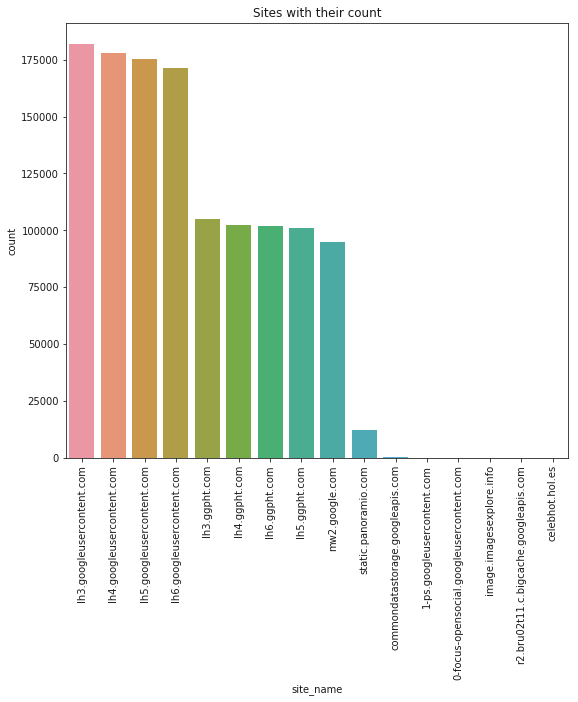

In [30]:
# Plot the Sites with their count
plt.figure(figsize = (9, 8))
plt.title('Sites with their count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

## occurances of sites in test_data

In [31]:
# Occurance of site in decreasing order(Top categories)
temp = pd.DataFrame(test_data.site_name.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['site_name','count']
temp

,site_name,count
0,lh3.googleusercontent.com,116855
1,lh3.ggpht.com,166
2,lh5.ggpht.com,134
3,lh4.ggpht.com,123
4,images1-focus-opensocial.googleusercontent.com,102
5,lh6.ggpht.com,92
6,lh5.googleusercontent.com,80
7,lh4.googleusercontent.com,55
8,static.panoramio.com,47
9,lh6.googleusercontent.com,28


### Total unique sites are 25 in test data and some are different from train_data


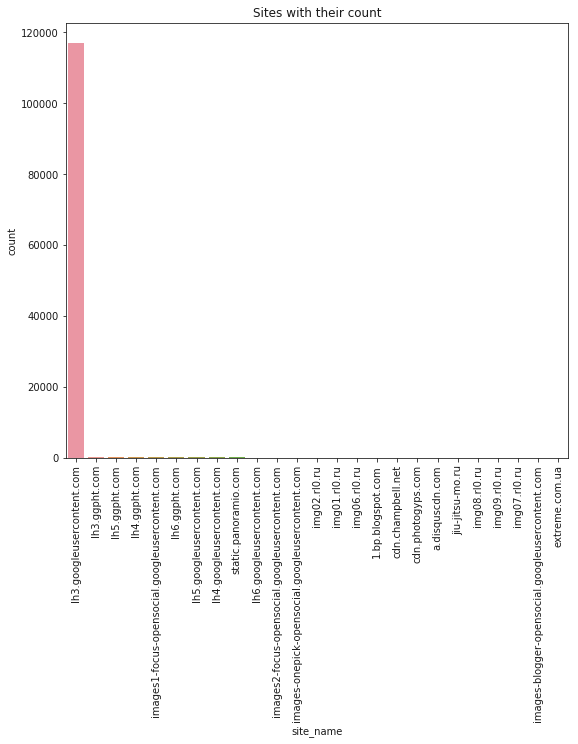

In [32]:
# Plot the Sites with their count
plt.figure(figsize = (9, 8))
plt.title('Sites with their count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### As we can see that most of the images are taken from one site only.

##### Referances :
 * https://www.kaggle.com/mxdbld/yadv-simple-exploration-of-google-recognition 
 * https://www.kaggle.com/gpreda/google-landmark-recognition-challenge-eda